In [1]:
!pip install -U git+https://github.com/huggingface/transformers.git
!pip install diffusers transformers accelerate scipy safetensors

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-zmpfexp9
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-zmpfexp9
  Resolved https://github.com/huggingface/transformers.git to commit 588faad1062198e45cf3aebed21dc1fc1e1ed0d7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for transformers: filename=transformers-4.26.0.dev0-py3-none-any.whl size=6062223 sha256=06b2b7f4c102609c970dbc5d8167939cd2554b1de73537d0e248bff4a6f46f67
  Stored in directory: /tmp/pip-ephem-wheel-cache-bykilym9/wheels/05/0a/97/64ae47c27ba95fae2cb5838e7b4b7247a34d4a8ba5f7092de2
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.22.1
    Uninstalling transformers-4.22.1:
      Successfully uninstalled transformers-4.22.1
     |████████████████████████████████| 1.2 MB 4.6 MB/s eta 0

In [7]:
!pip install diffusers==0.11.1

     |████████████████████████████████| 524 kB 4.9 MB/s eta 0:00:01
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.9.0
    Uninstalling diffusers-0.9.0:
      Successfully uninstalled diffusers-0.9.0


In [122]:
import diffusers

In [123]:
diffusers.__version__

'0.11.1'

In [133]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline, StableDiffusionImg2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
   "stabilityai/stable-diffusion-2-depth",
   # "stabilityai/stable-diffusion-2-1",
   torch_dtype=torch.float16,
).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [127]:
def pil_cath(pil_arr):
    images = pil_arr
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
    return new_im

In [128]:
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# init_image = Image.open(requests.get(url, stream=True).raw)

In [130]:
init_image = Image.open('ostap1.jpg')
init_image = init_image.convert('RGB')
init_img_height, init_img_width = init_image.size
init_image = init_image.resize((512, 512))

# prompt = "classic disney style"
prompt = "high resolution, detailed anime face, detailed anime hands, detailed anime body, 4k, paint in anime style"
n_propmt = "realistic, bad, deformed, ugly, bad anotomy, Morbid, Extra fingers, Poorly drawn hands, Mutation, Blurry, Extra limbs, Gross proportions, Missing arms, Mutated hands, Long neck, Duplicate, Mutilated, Mutilated hands, Poorly drawn face, Deformed, Bad anatomy, Cloned face, Malformed limbs, Missing legs, Too many fingers"

strength = 0.4
guidance_scale = 15

image = pipe(prompt=prompt, num_inference_steps=200, guidance_scale=guidance_scale, image=init_image, negative_prompt=n_propmt, strength=strength).images[0]

  0%|          | 0/80 [00:00<?, ?it/s]

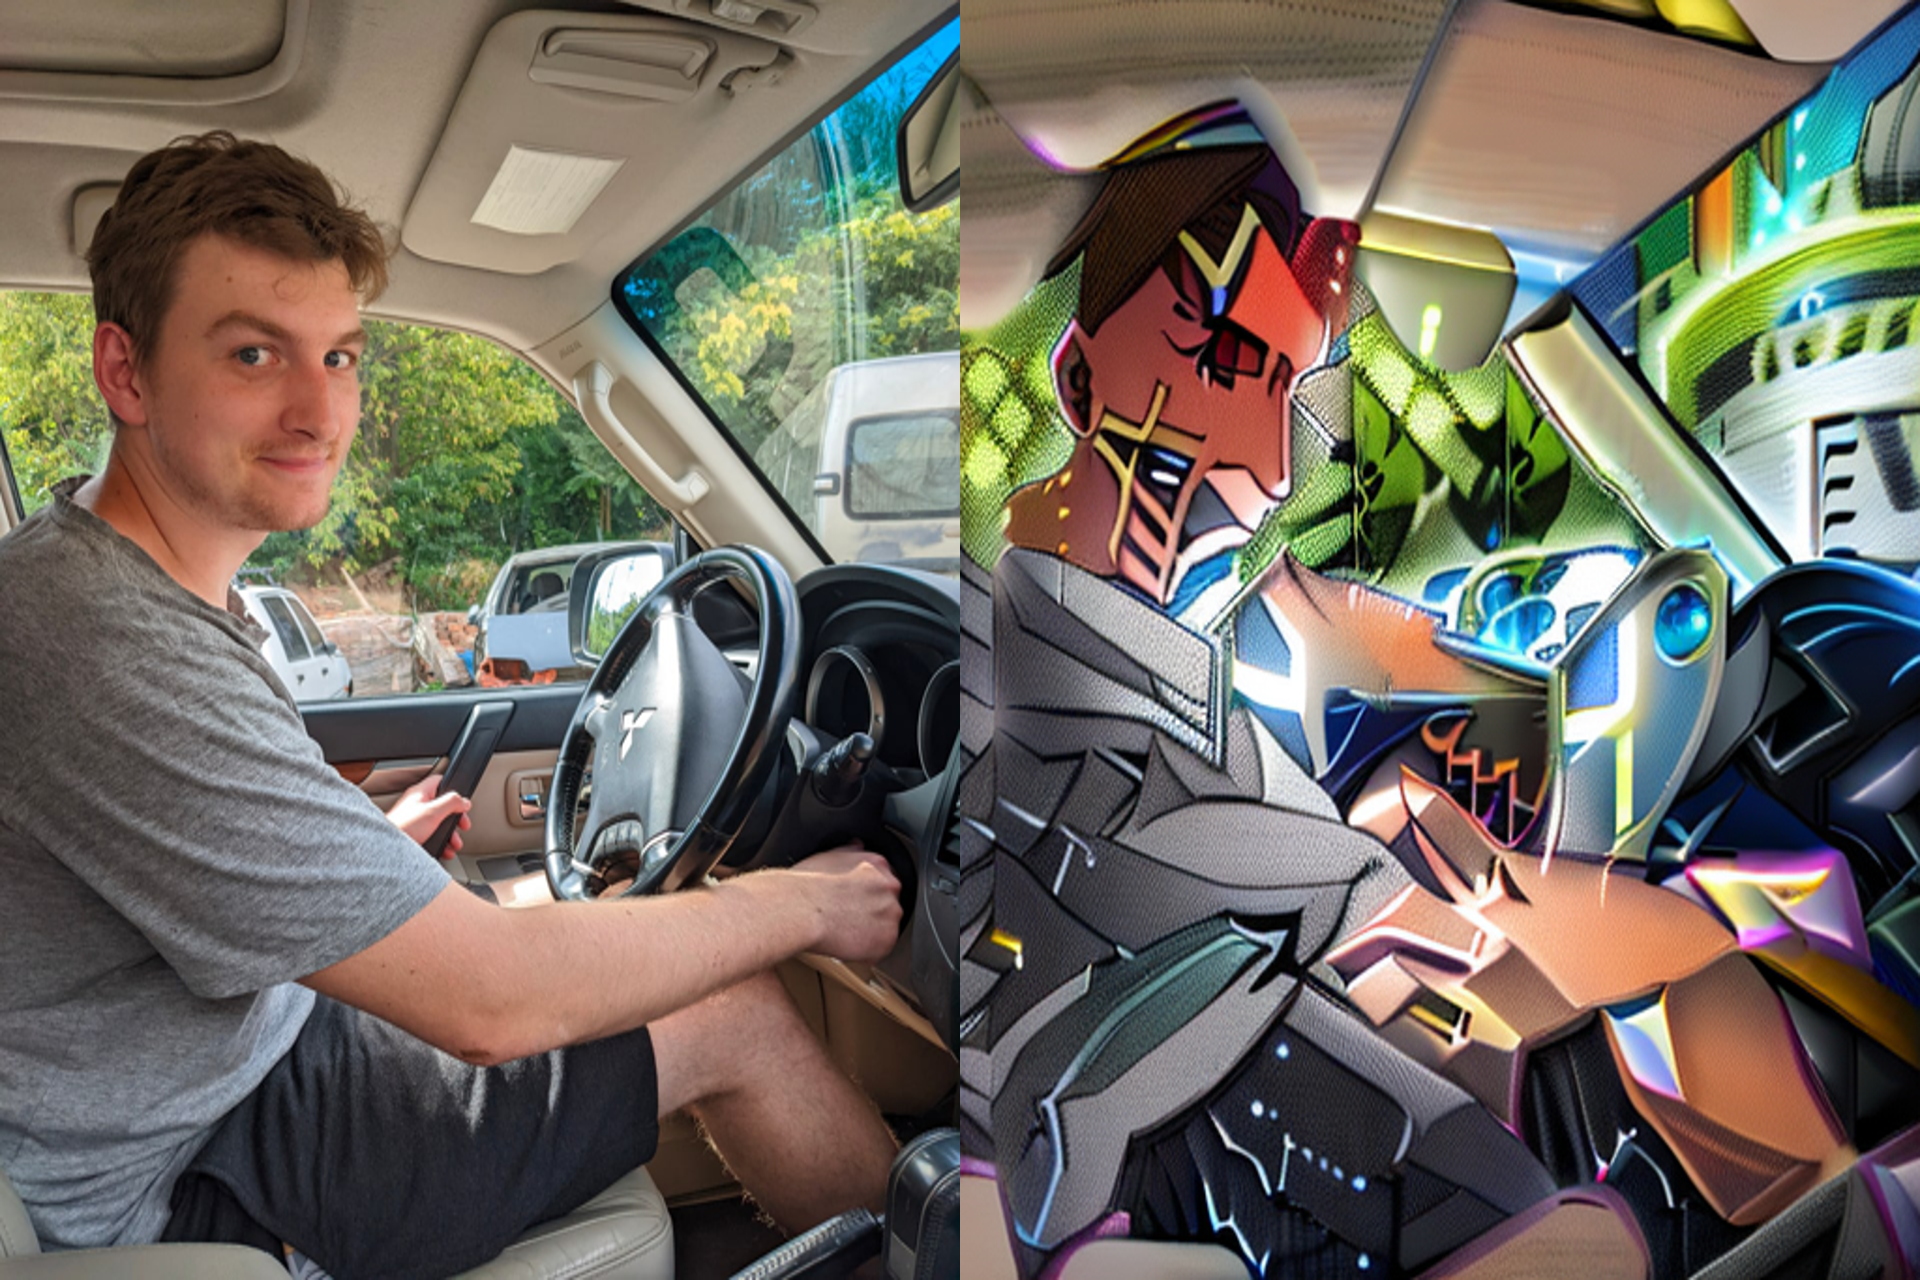

In [131]:
pil_cath([init_image.resize((init_img_height, init_img_width)), image.resize((init_img_height, init_img_width))])